<a href="https://colab.research.google.com/github/stepan-fukalov/ml/blob/master/yolo_custom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Chess Pieces
## Model: YOLOv8

In [13]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
ROOT_DIR = '/content/gdrive/My Drive/Colab Notebooks/chess_pieces_detection'
root_dir = Path(ROOT_DIR)

## Images
Image dataset consists of chess pieces of different types and colors.

Text(0.5, 1.0, 'Train Images')

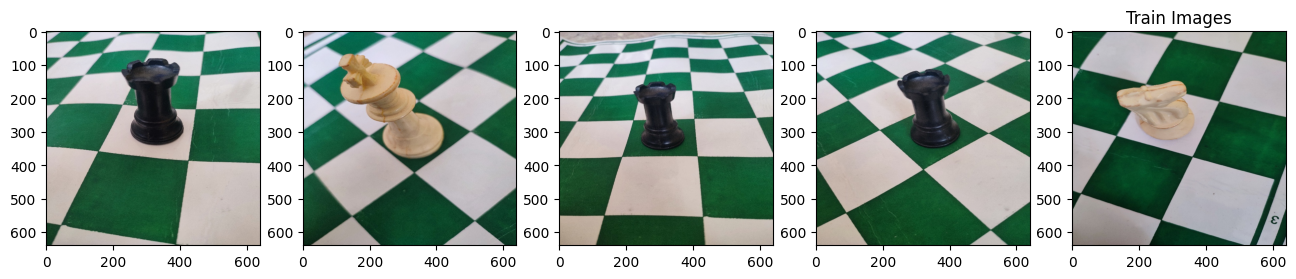

In [18]:
train_images_folder = root_dir/"data/images/train"
fig = plt.figure(figsize=(16, 7))
image_subset = next(os.walk(train_images_folder))[2][:5]
for idx, image_name in enumerate(image_subset, 1):
  image_path = train_images_folder/image_name
  plt.subplot(1, 5, idx)
  image = Image.open(image_path)
  plt.imshow(image)

## Training

In [19]:
!pip install -q ultralytics

In [29]:
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")

results = model.train(data=os.path.join(ROOT_DIR, 'config.yaml'), epochs=10)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [30]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [31]:
!scp -r /content/runs '/content/gdrive/My Drive/Colab Notebooks/chess_pieces_detection'

## Let's see the results

In [24]:
results_path = Path("runs/detect/train")

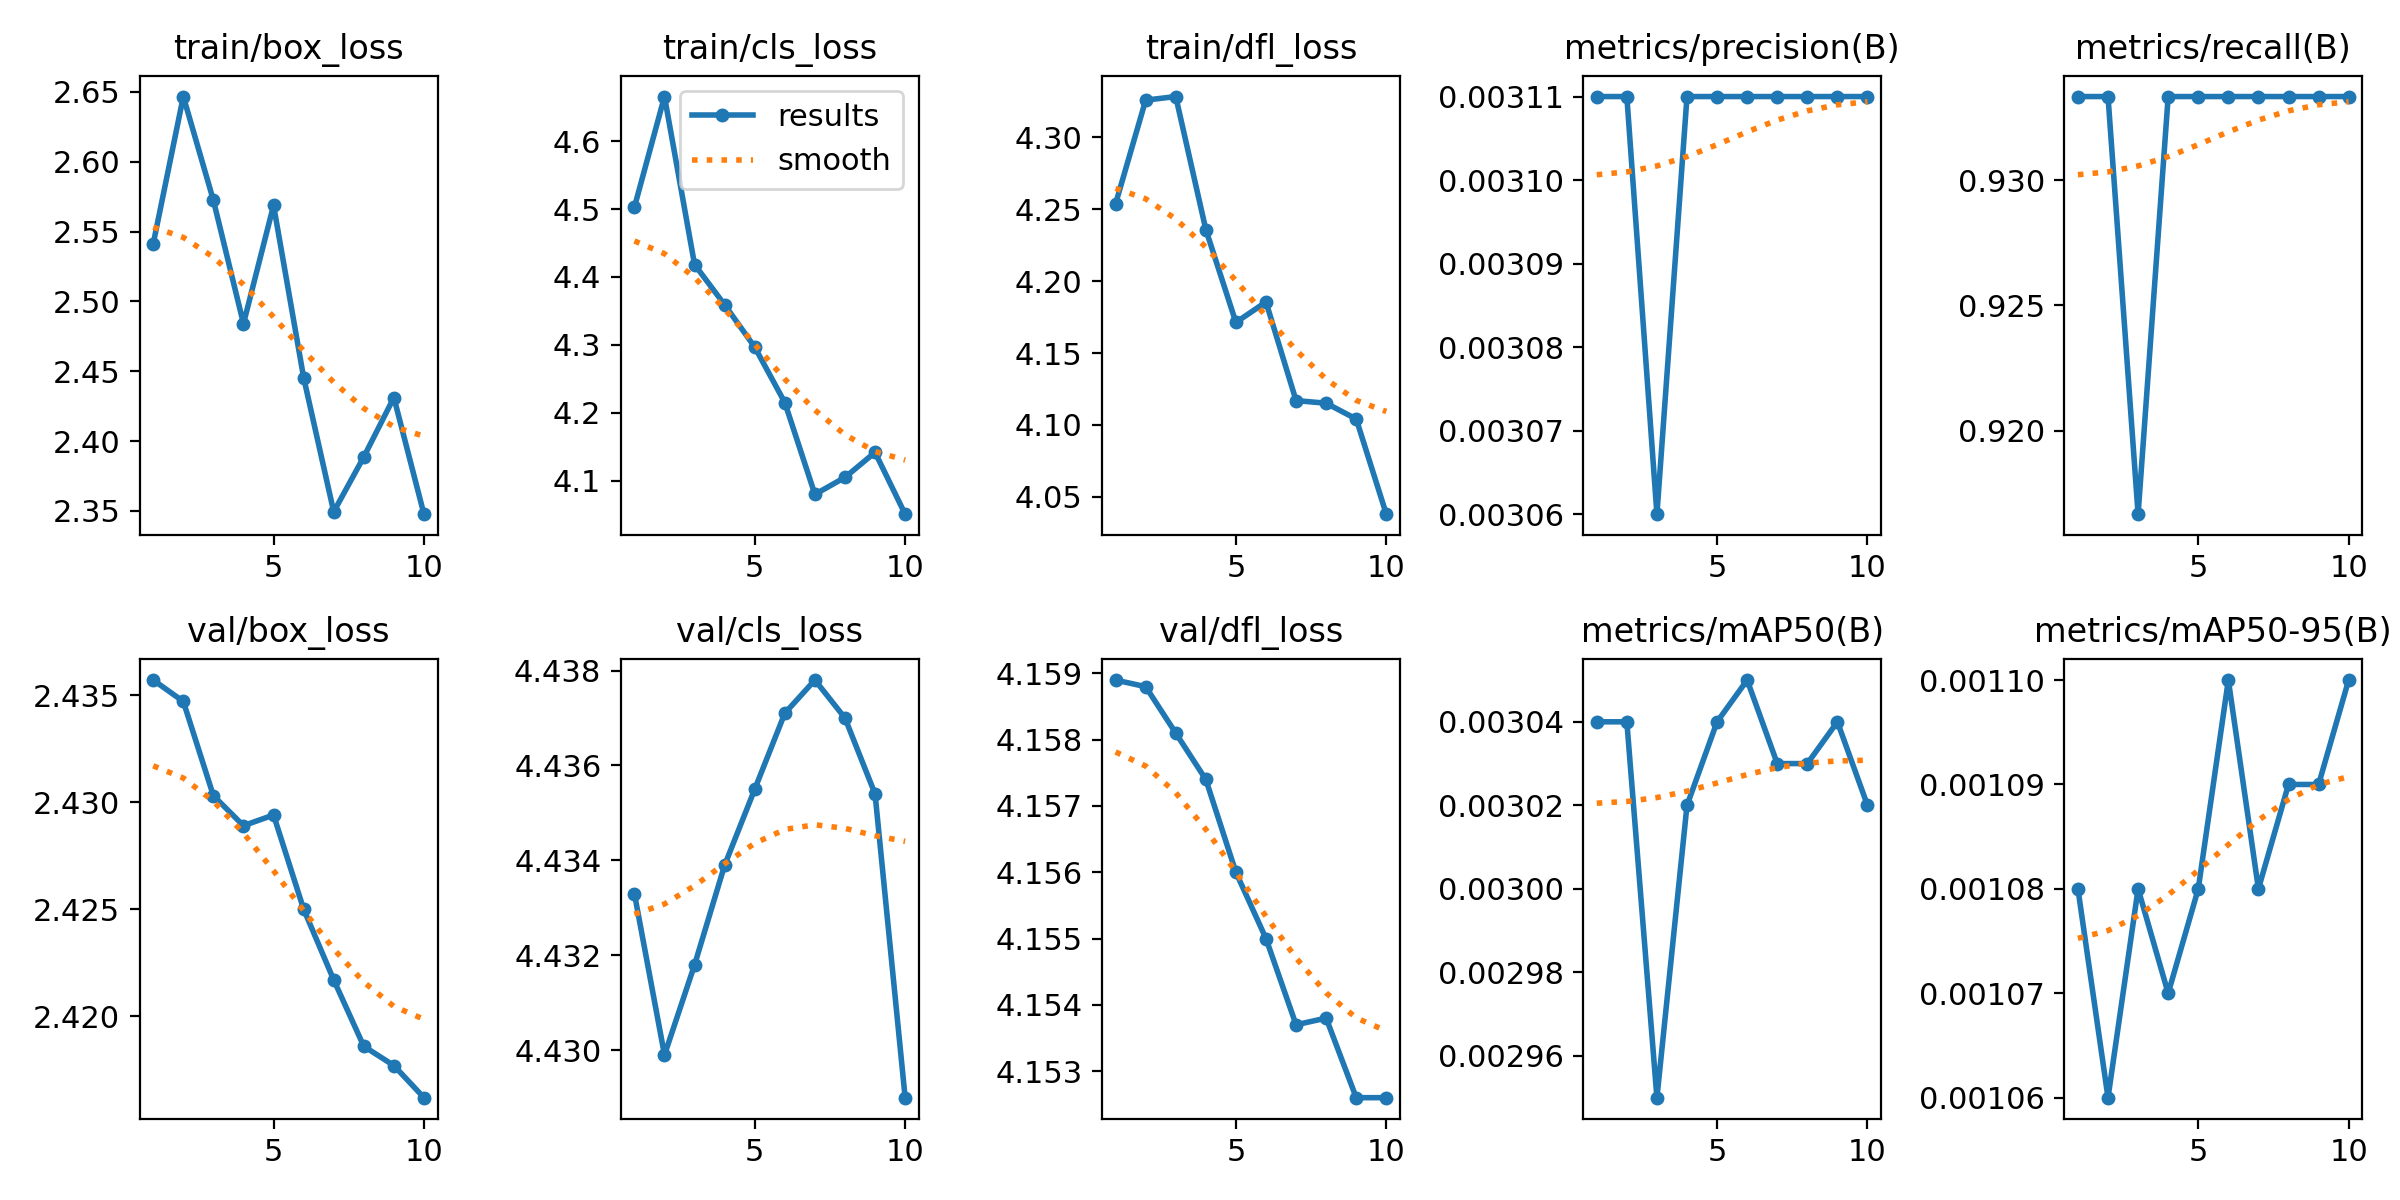

In [26]:
Image.open(results_path/"results.png")

As we can see in this picture, both train and validation losses are going down.

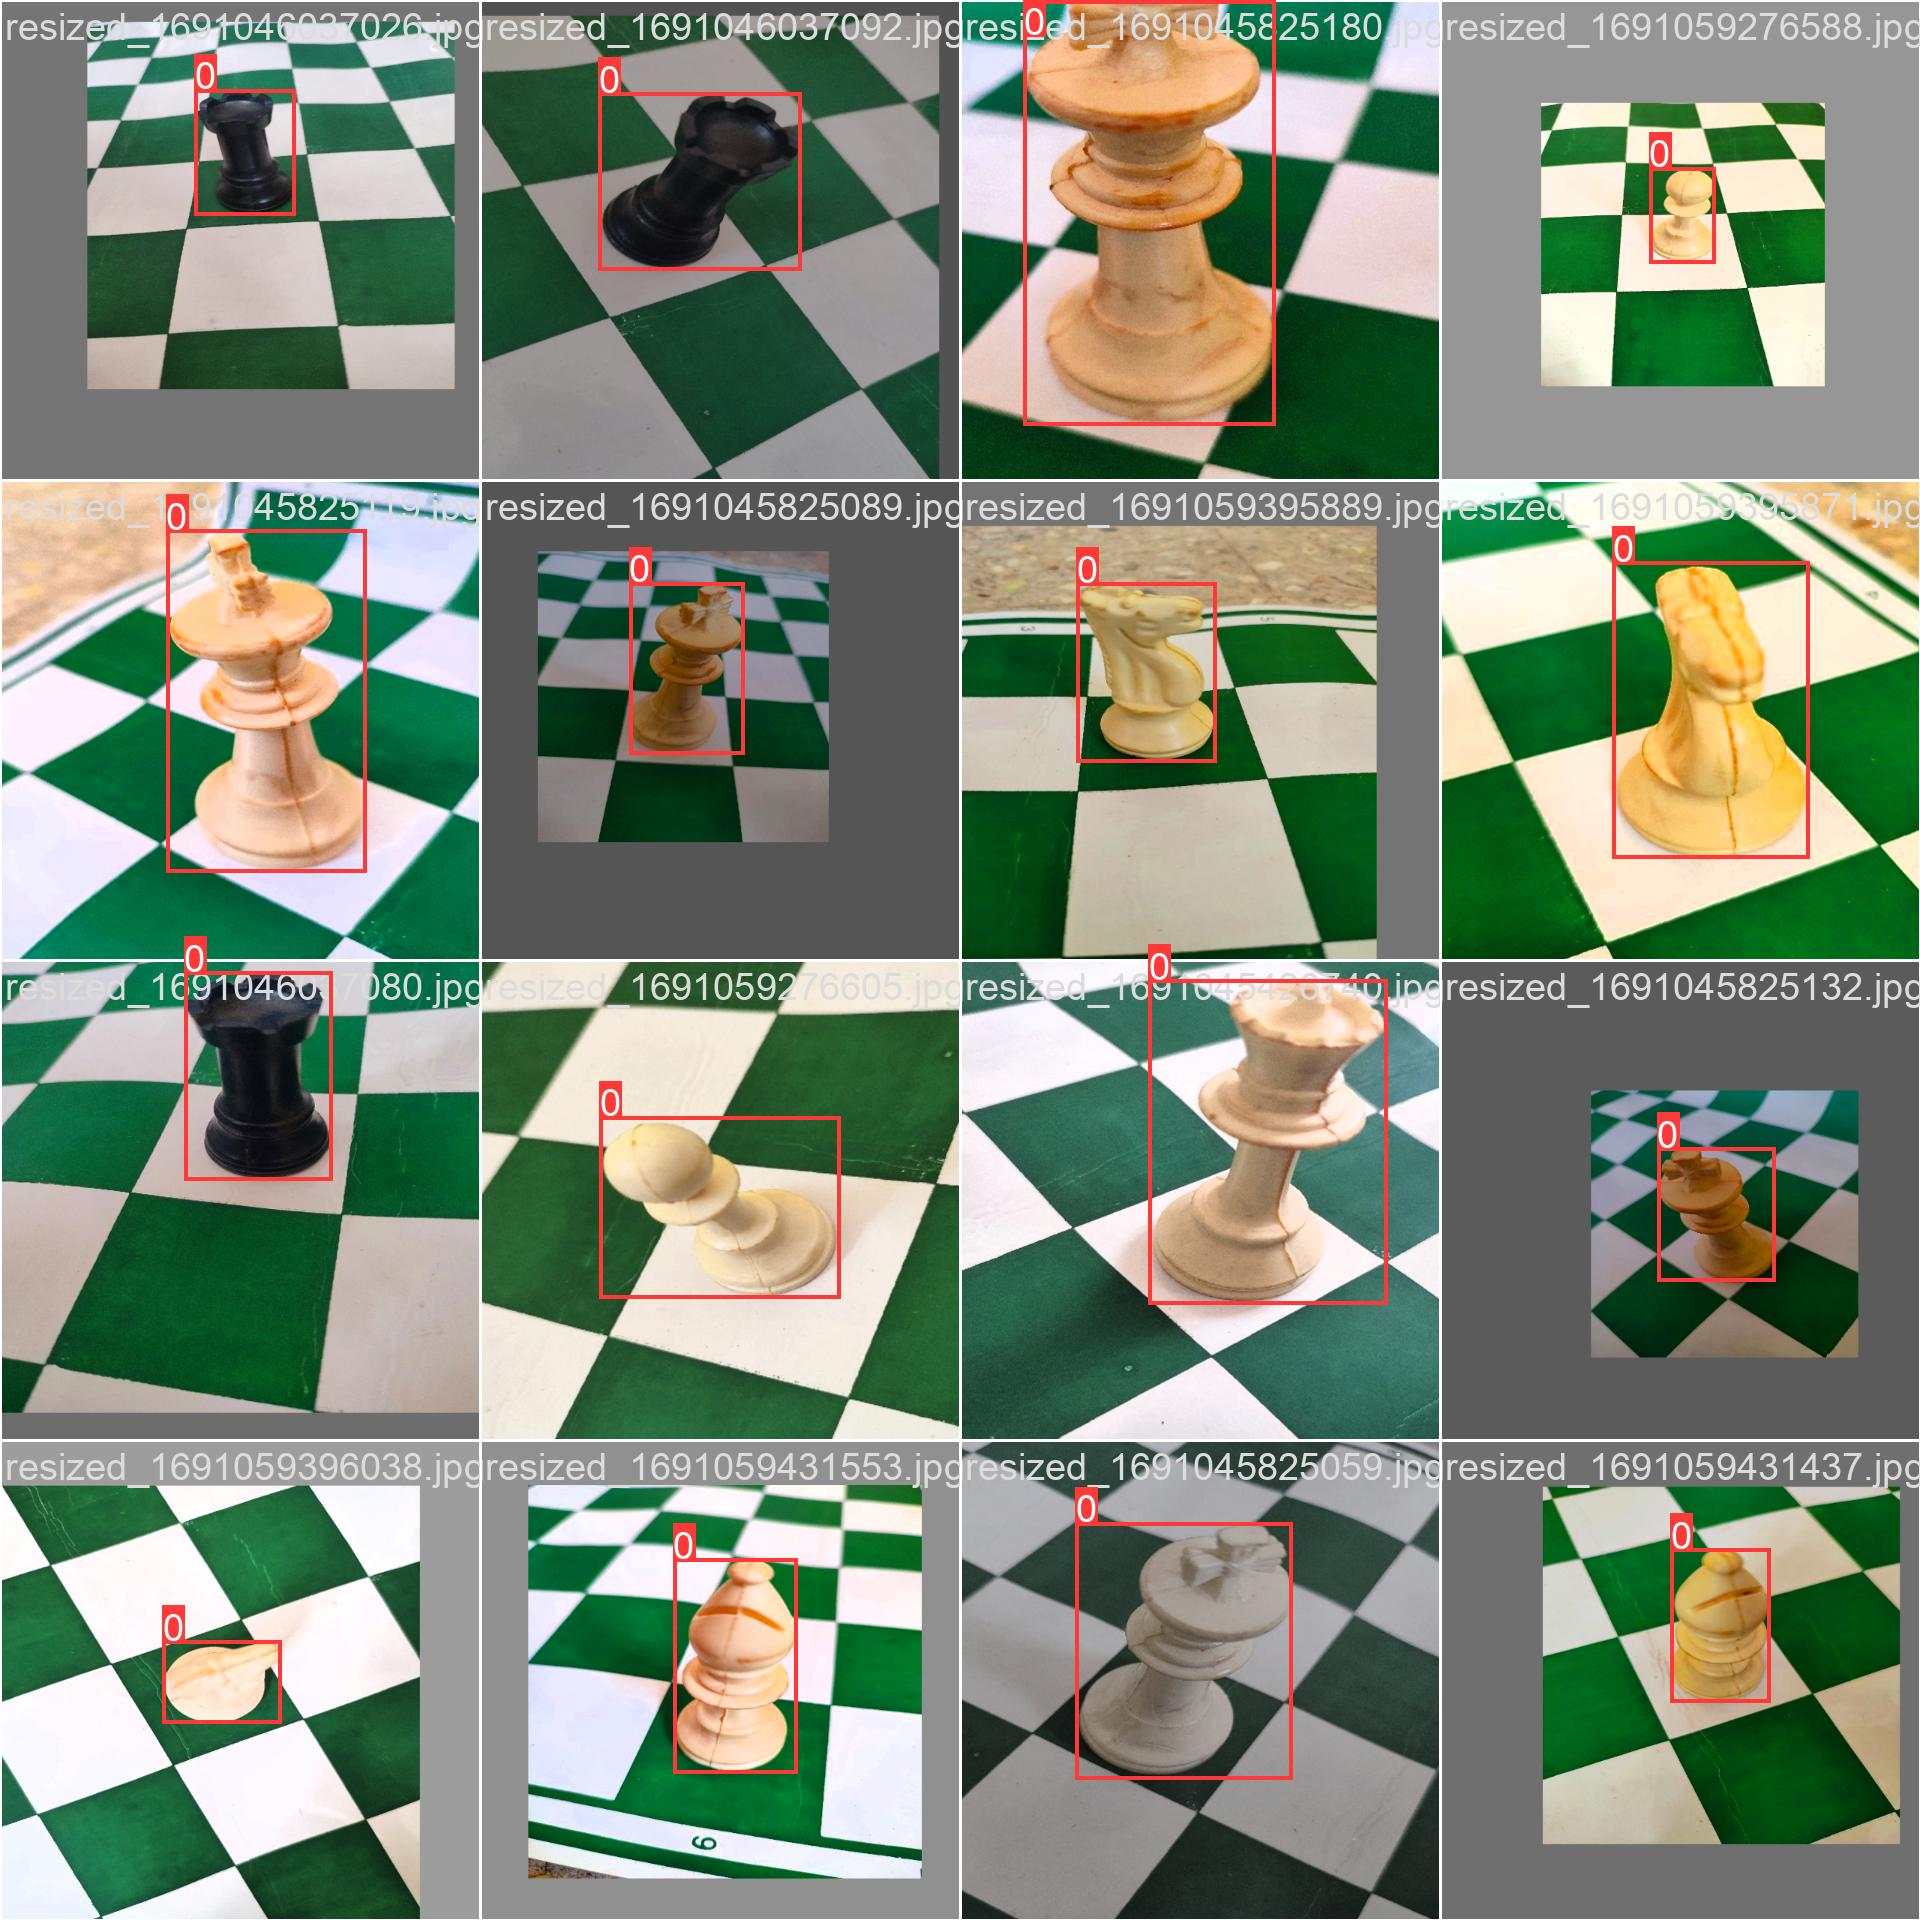

In [32]:
Image.open(results_path/"train_batch0.jpg")

Great!
Model is capable of detecting chess piece and has a good performance on augmented data!